In [1]:
import pandas as pd
from sodapy import Socrata
from uszipcode import SearchEngine # note this does an approximation of zipcode based upon a radius
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

# import pickle

In [2]:
pd.options.display.max_columns=20

In [3]:
client = Socrata("data.lacity.org", None)

results = client.get("7fvc-faax", limit=2000000)
# results = client.get("7fvc-faax", limit=200)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
# drop irrelevant columns
results_df.drop(columns=[':@computed_region_2dna_qi2s',
 ':@computed_region_k96s_3jcv',
 ':@computed_region_kqwf_mjcx',
 ':@computed_region_qz3q_ghft',
 ':@computed_region_tatf_ua23',
 ':@computed_region_ur2y_g4cx',
 'crm_cd_1',
 'crm_cd_2',
 'crm_cd_3',
 'crm_cd_4',                        
 'cross_street'], inplace=True)

In [5]:
results_df.head()

,area_id,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,location,location_1,mocodes,...,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
0,07,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,"{'type': 'Point', 'coordinates': [-118.3555, 3...",0421,...,PARK/PLAYGROUND,0724,AA,Adult Arrest,1050,41,B,M,VERBAL THREAT,511
1,07,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,"{'type': 'Point', 'coordinates': [-118.3451, 3...",0400 2000,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0735,AA,Adult Arrest,0600,27,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400
2,07,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,"{'type': 'Point', 'coordinates': [-118.3765, 3...",0400 0416 0421 1402,...,PARKING LOT,0721,AA,Adult Arrest,2350,20,H,F,VERBAL THREAT,511
3,07,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,"{'type': 'Point', 'coordinates': [-118.3219, 3...",0400 0416 2000,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0759,AA,Adult Arrest,2330,35,O,M,UNKNOWN WEAPON/OTHER WEAPON,500
4,07,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3353, 3...",0400 0416 2000,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0787,AO,Adult Other,2000,43,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400


In [6]:
# with open('results_df.pickle', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(results_df, f, pickle.HIGHEST_PROTOCOL)

In [7]:
# with open('results_df.pickle', 'rb') as f:
#     # The protocol version used is detected automatically, so we do not
#     # have to specify it.
#     results_df = pickle.load(f)

In [8]:
list(results_df)

['area_id',
 'area_name',
 'crm_cd',
 'crm_cd_desc',
 'date_occ',
 'date_rptd',
 'dr_no',
 'location',
 'location_1',
 'mocodes',
 'premis_cd',
 'premis_desc',
 'rpt_dist_no',
 'status',
 'status_desc',
 'time_occ',
 'vict_age',
 'vict_descent',
 'vict_sex',
 'weapon_desc',
 'weapon_used_cd']

In [9]:
rows=len(results_df)
search = SearchEngine(simple_zipcode=True)
lon = []
lat = []
zipcode = []
year_single = '2000'
year = []
for i in range(rows):
    # single values for readability
    lattitude = float(results_df['location_1'][i]['coordinates'][1])
    longitude = float(results_df['location_1'][i]['coordinates'][0])
    year_single = results_df['date_occ'][i][:4]
    # append to arrays
    lon.append(longitude)
    lat.append(lattitude)
    try:
        zipcode.append(search.by_coordinates(lattitude, longitude, radius=5, returns=1)[0].zipcode)
    except:
        zipcode.append('00000')
        print(f'{i},{lattitude},{longitude}')
    year.append(year_single)
results_df['lat'] = lat
results_df['lon'] = lon
results_df['zipcode'] = zipcode
results_df['year'] = year

2513,0.0,0.0
12985,34.706,-118.0879
32768,0.0,0.0
40068,0.0,0.0
54647,0.0,0.0
142345,34.706,-118.0879
143901,0.0,0.0
143937,0.0,0.0
144892,0.0,0.0
144964,0.0,0.0
145194,0.0,0.0
145223,0.0,0.0
158157,0.0,0.0
181231,0.0,0.0
186642,34.576,-118.0115
194622,33.3427,-118.3258
202117,0.0,0.0
202226,0.0,0.0
202858,0.0,0.0
203448,0.0,0.0
203594,0.0,0.0
203820,0.0,0.0
203935,0.0,0.0
220141,0.0,0.0
241522,0.0,0.0
272819,0.0,0.0
274499,0.0,0.0
286349,0.0,0.0
321578,0.0,0.0
351718,34.6765,-118.1089
356908,0.0,0.0
361817,0.0,0.0
372580,0.0,0.0
405296,33.3427,-118.3258
405551,33.3427,-118.3258
421637,0.0,0.0
426250,0.0,0.0
426251,0.0,0.0
426252,0.0,0.0
426253,0.0,0.0
426254,0.0,0.0
426255,0.0,0.0
426256,0.0,0.0
426257,0.0,0.0
426258,0.0,0.0
426259,0.0,0.0
426260,0.0,0.0
426261,0.0,0.0
426262,0.0,0.0
426263,0.0,0.0
426264,0.0,0.0
426265,0.0,0.0
426266,0.0,0.0
426267,0.0,0.0
426268,0.0,0.0
426269,0.0,0.0
426270,0.0,0.0
434296,0.0,0.0
434312,0.0,0.0
434313,0.0,0.0
434314,0.0,0.0
434315,0.0,0.0
434316,0.

582470,0.0,0.0
582471,0.0,0.0
582472,0.0,0.0
582473,0.0,0.0
588366,0.0,0.0
588386,0.0,0.0
588387,0.0,0.0
588388,0.0,0.0
588389,0.0,0.0
588390,0.0,0.0
588391,0.0,0.0
588392,0.0,0.0
588393,0.0,0.0
588394,0.0,0.0
588395,0.0,0.0
588396,0.0,0.0
588397,0.0,0.0
588398,0.0,0.0
588399,0.0,0.0
588400,0.0,0.0
588401,0.0,0.0
588402,0.0,0.0
588403,0.0,0.0
588404,0.0,0.0
588405,0.0,0.0
588406,0.0,0.0
588407,0.0,0.0
588408,0.0,0.0
588409,0.0,0.0
588410,0.0,0.0
588411,0.0,0.0
588412,0.0,0.0
588413,0.0,0.0
588414,0.0,0.0
588415,0.0,0.0
588416,0.0,0.0
588417,0.0,0.0
588418,0.0,0.0
588419,0.0,0.0
592879,0.0,0.0
596751,0.0,0.0
598656,0.0,0.0
598657,0.0,0.0
598672,0.0,0.0
598673,0.0,0.0
598698,0.0,0.0
598729,0.0,0.0
598730,0.0,0.0
598731,0.0,0.0
598733,0.0,0.0
598734,0.0,0.0
598735,0.0,0.0
598736,0.0,0.0
598737,0.0,0.0
598738,0.0,0.0
598741,0.0,0.0
598742,0.0,0.0
598743,0.0,0.0
598744,0.0,0.0
598745,0.0,0.0
598746,0.0,0.0
598747,0.0,0.0
598748,0.0,0.0
598749,0.0,0.0
598750,0.0,0.0
598752,0.0,0.0
598753,0.0

In [10]:
len(results_df)

1931442

In [11]:
# remove lines with no corresponding zip code
results_df = results_df[results_df.zipcode != '00000']
len(results_df)

1930536

In [12]:
results_df.head()

,area_id,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,location,location_1,mocodes,...,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year
0,07,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,"{'type': 'Point', 'coordinates': [-118.3555, 3...",0421,...,1050,41,B,M,VERBAL THREAT,511,34.0761,-118.3555,90036,2010
1,07,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,"{'type': 'Point', 'coordinates': [-118.3451, 3...",0400 2000,...,0600,27,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,34.0649,-118.3451,90036,2010
2,07,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,"{'type': 'Point', 'coordinates': [-118.3765, 3...",0400 0416 0421 1402,...,2350,20,H,F,VERBAL THREAT,511,34.0730,-118.3765,90048,2010
3,07,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,"{'type': 'Point', 'coordinates': [-118.3219, 3...",0400 0416 2000,...,2330,35,O,M,UNKNOWN WEAPON/OTHER WEAPON,500,34.0516,-118.3219,90005,2010
4,07,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3353, 3...",0400 0416 2000,...,2000,43,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,34.0399,-118.3353,90019,2010


In [13]:
# in case you want to keep run the data from the cvs file instead of the api
file_name='Resources\los_angeles_crime_statistics.csv'
results_df.to_csv(file_name, encoding='utf-8')

In [3]:
# if you have the csv file available and want to pull the data from the csv file, uncomment next line
results_df=pd.read_csv('Resources\los_angeles_crime_statistics.csv')

In [15]:
# FD: The analysis can only be as good as the underlying data
# https://www.latimes.com/local/crime/la-me-lapd-audit-20151206-story.html

In [16]:
# FD: Crime classifications, the good, the bad and the ugly
# Modernizing Crime Statistics: Report 1: Defining and Classifying Crime (2016)
# Chapter: 5 Proposed Classification of Crime for Statistical Purposes
# https://www.nap.edu/read/23492/chapter/7#121

In [4]:
# get all crime codes with description and validate it is a one to one code versus description
aggregation = { 
     'crm_cd_desc': 'nunique' 
}
crime_codes = results_df.groupby(['crm_cd','crm_cd_desc']).agg(aggregation)

crime_codes.to_csv('crime codes.csv', encoding='utf-8')
# manual determination of violent crime as no indicator available to determine violent crime.
# The LA Times article describes violent crime as 'violent crime — which includes homicide, rape, robbery and aggravated assault'.
crime_codes

,,crm_cd_desc
crm_cd,crm_cd_desc,
110,CRIMINAL HOMICIDE,1
113,"MANSLAUGHTER, NEGLIGENT",1
121,"RAPE, FORCIBLE",1
122,"RAPE, ATTEMPTED",1
210,ROBBERY,1
220,ATTEMPTED ROBBERY,1
230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1
231,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1
235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,1


In [ ]:
# general crime historical review ###############################################3

In [5]:
# remove 2019
processing_df = results_df.loc[results_df['year'] != '2019']

years = processing_df.year.unique()
years.sort
years

C:\Users\jcmho\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [54]:
processing_df.head()

,area_id,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,location,location_1,mocodes,...,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd,lat,lon,zipcode,year
0,07,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-12T00:00:00.000,2010-03-12T00:00:00.000,100700660,7600 BEVERLY BL,"{'type': 'Point', 'coordinates': [-118.3555, 3...",0421,...,1050,41,B,M,VERBAL THREAT,511,34.0761,-118.3555,90036,2010
1,07,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-13T00:00:00.000,2010-03-13T00:00:00.000,100700661,600 S DETROIT ST,"{'type': 'Point', 'coordinates': [-118.3451, 3...",0400 2000,...,0600,27,O,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,34.0649,-118.3451,90036,2010
2,07,Wilshire,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700688,LA CIENEGA BL,"{'type': 'Point', 'coordinates': [-118.3765, 3...",0400 0416 0421 1402,...,2350,20,H,F,VERBAL THREAT,511,34.0730,-118.3765,90048,2010
3,07,Wilshire,626,INTIMATE PARTNER - SIMPLE ASSAULT,2010-03-23T00:00:00.000,2010-03-24T00:00:00.000,100700689,1100 NORTON AV,"{'type': 'Point', 'coordinates': [-118.3219, 3...",0400 0416 2000,...,2330,35,O,M,UNKNOWN WEAPON/OTHER WEAPON,500,34.0516,-118.3219,90005,2010
4,07,Wilshire,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2010-04-05T00:00:00.000,2010-04-05T00:00:00.000,100700719,4400 W WASHINGTON BL,"{'type': 'Point', 'coordinates': [-118.3353, 3...",0400 0416 2000,...,2000,43,K,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400,34.0399,-118.3353,90019,2010


In [66]:
# group by year / zipcode ; count number of crimes (dr_no)
zip_crime_intermediate = processing_df.sort_values(by=['zipcode'])
aggregation = { 
     'dr_no': 'count' 
}
zip_crime = zip_crime_intermediate.groupby(['zipcode']).agg(aggregation)
zip_crime = zip_crime.sort_values(by=['dr_no'], ascending=False)
zip_crime.reset_index(level=0, inplace=True)
zip_crime.head()

,zipcode,dr_no
0,90037,56234
1,90003,50984
2,90028,50792
3,90011,43418
4,90057,42240


In [65]:
zip_crime_top = zip_crime[:5]
zip_crime_top

,zipcode,dr_no
0,90037,56234
1,90003,50984
2,90028,50792
3,90011,43418
4,90057,42240


In [60]:
zip_crime.tail()

,zipcode,dr_no
229,91104,1
230,91105,1
231,91207,1
232,91354,1
233,93591,1


In [61]:
type(zip_crime.zipcode[0])

str

In [72]:
# get top into array to process zipcodes for line plot
zip_top = zip_crime_top.zipcode.unique()
zip_top

array(['90037', '90003', '90028', '90011', '90057'], dtype=object)

In [74]:
aggregation = { 
     'dr_no': 'nunique' 
}

zip_90037 = processing_df[processing_df.zipcode == '90037'].groupby(['year','zipcode']).agg(aggregation)
zip_90003 = processing_df[processing_df.zipcode == '90003'].groupby(['year','zipcode']).agg(aggregation)
zip_90028 = processing_df[processing_df.zipcode == '90028'].groupby(['year','zipcode']).agg(aggregation)
zip_90011 = processing_df[processing_df.zipcode == '90011'].groupby(['year','zipcode']).agg(aggregation)
zip_90057 = processing_df[processing_df.zipcode == '90057'].groupby(['year','zipcode']).agg(aggregation)

# top_zips={zipcode:pd.DataFrame(processing_df[processing_df.type == zipcode].groupby(['year']).agg(aggregation)) for zipcode in zip_top} # works

In [75]:
zip_90037.reset_index(level=0, inplace=True)
zip_90003.reset_index(level=0, inplace=True)
zip_90028.reset_index(level=0, inplace=True)
zip_90011.reset_index(level=0, inplace=True)
zip_90057.reset_index(level=0, inplace=True)

# top_zips.reset_index(level=0, inplace=True)

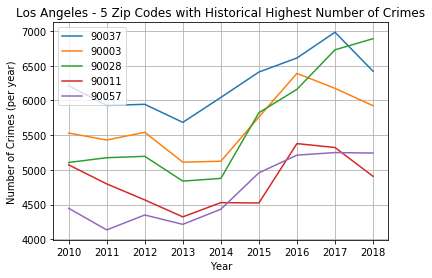

In [93]:
# plot lines
plot_90037 = plt.plot(zip_90037['year'],zip_90037['dr_no'],label='90037')
plot_90003 = plt.plot(zip_90003['year'],zip_90003['dr_no'],label='90003')
plot_90028 = plt.plot(zip_90028['year'],zip_90028['dr_no'],label='90028')
plot_90011 = plt.plot(zip_90011['year'],zip_90011['dr_no'],label='90011')
plot_90057 = plt.plot(zip_90057['year'],zip_90057['dr_no'],label='90057')
# plot layout
plt.xlabel('Year')
plt.ylabel('Number of Crimes (per year)')
plt.title('Los Angeles - 5 Zip Codes with Historical Highest Number of Crimes')
plt.legend()
plt.grid(b=None, which='major', axis='both')
# save plot
plt.savefig('Los Angeles - 5 Zip Codes with Historical Highest Number of Crimes.png')
# show plot
plt.show()

In [109]:
# chart review:
# - disproportionate increase for zip code 90028
# - 2018 from the top 5 crime perspective shows a general decrease of crime

In [110]:
# violent crime historical review ###############################################3

In [24]:
# per initial list review with team member with history in law enforcement
violent_crime = [ '110', '113','121','122','210','220','230','231','235','236','250','251','434',
                 '435','436','451','753','821','860','910','920']
type(violent_crime)

list

In [7]:
# remove 2019
violent_crime_df = results_df.loc[results_df['year'] != '2019']

C:\Users\jcmho\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [36]:
# violent_crime_df = results_df.loc[np.where(results_df.crm_cd in violent_crime)] ######### need help on this #######
# crm_cds = results_df["crm_cd"].tolist()
# mask = np.isin(crm_cds, violent_crime)
violent_crime_df = violent_crime_df[violent_crime_df["crm_cd"].isin(violent_crime)]

In [38]:
len(violent_crime_df)

221429

In [26]:
df_0 = results_df

In [27]:
# group by zipcode /crm_cd ; count number of crimes (dr_no) 
aggregation = { 
     'dr_no': 'nunique' 
}
df_1 = results_df.groupby(['zipcode','crm_cd']).agg(aggregation)
df_1

dr_no
zipcode crm_cd       
90001   110        21
        121        23
        122         4
        210       618
        220        95
        230       595
        231         7
        235        20
        236        81
        237        33
        251        17
        310       497
        320        37
        330       392
        331        83
        341       160
        343         3
        345         1
        350        99
        351         8
        352         3
        354       230
        410        10
        420       329
        421         3
        433         4
        434         2
        436         1
        437        15
        438         1
...               ...
91768   745         1
91773   740         1
        930         1
91775   510         1
91789   626         1
91790   210         1
        440         2
91792   330         1
91801   330         1
91803   210         1
        624         1
92372   341         1
93510   745         1
93534   740         1
93550   230         1
        237         1
        330         2
        354         1
        624         1
        626         1
93551   310         2
        330         2
        354         2
        624         3
        740         1
        745         1
        821         1
93552   420         1
        624         1
93591   626         1

[12876 rows x 1 columns]

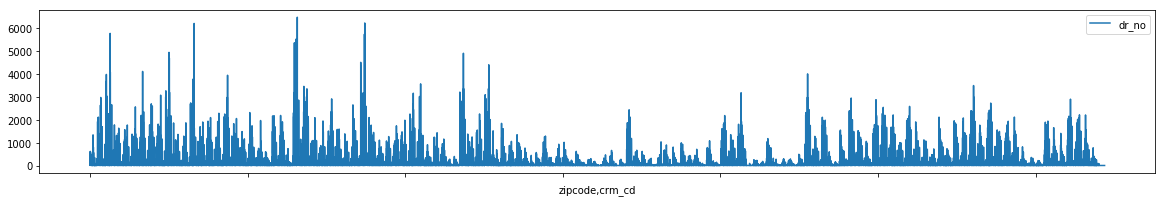

In [28]:
df_1.plot(kind="line", figsize=(20,3))

In [29]:
# group by year / zipcode ; count number of crimes (dr_no)
aggregation = { 
     'dr_no': 'nunique' 
}
df_2 = results_df.groupby(['year','zipcode']).agg(aggregation)
df_2

dr_no
year zipcode       
2010 90001      945
     90002     3021
     90003     5530
     90004     1845
     90005     1691
     90006     2261
     90007     2976
     90008     2795
     90010     2277
     90011     5072
     90012     1011
     90013      894
     90014     2989
     90015     1676
     90016     2399
     90017     1549
     90018     3841
     90019     2359
     90020     1227
     90021     1396
     90022        3
     90023     1185
     90024      509
     90025     2031
     90026     2207
     90027      223
     90028     5106
     90029     4120
     90031     1856
     90032     1503
...             ...
2019 91326      124
     91331      514
     91335      472
     91340      384
     91342      151
     91343      489
     91344      281
     91345      218
     91352       86
     91356      364
     91364      129
     91367      375
     91401      369
     91402      576
     91403      278
     91405      606
     91406      371
     91411      419
     91423      308
     91436       94
     91501        2
     91504       49
     91505       38
     91601      488
     91602      226
     91604      189
     91605      581
     91606      435
     91607      273
     91608      110

[1610 rows x 1 columns]

In [30]:
# group by year / zipcode ; count number of crimes (dr_no)
df_4 = results_df.sort_values(by=['zipcode'])
aggregation = { 
     'dr_no': 'count' 
}
df_3 = df_4.groupby(['zipcode']).agg(aggregation)
df_3 = df_3.sort_values(by=['dr_no'], ascending=False)
df_3 = df_3[:10]
df_3.reset_index(level=0, inplace=True)
df_3.head()

,zipcode,dr_no
0,90037,57434
1,90003,52027
2,90028,51985
3,90011,44326
4,90057,43121


In [31]:
df_3.tail()

,zipcode,dr_no
5,90062,41388
6,90029,38193
7,90014,34519
8,91303,34475
9,90018,34427


In [32]:
df_5 = df_3['zipcode']
df_5

0    90037
1    90003
2    90028
3    90011
4    90057
5    90062
6    90029
7    90014
8    91303
9    90018
Name: zipcode, dtype: object

In [33]:
# rolling year

In [34]:
# 5 years

In [35]:
df_3 = df_3.sort_values(by='zipcode')
top_zipcodes = df_3.zipcode.unique()
top_zipcodes

array(['90003', '90011', '90014', '90018', '90028', '90029', '90037',
       '90057', '90062', '91303'], dtype=object)

In [36]:
# income

In [37]:
# home value

In [38]:
result

NameError: name 'result' is not defined